$$
\begin{array}{c}
\textbf{CAUSAL INFERENCE - Fall 2025}\\\\
\textit{Center for Data Science, New York University} \\\\
\textit{September 26, 2025}\\\\\
\text{ Prepared by: Vivek Kumar Agarwal}\\\\
\textbf{Recitation 4: Experimens andStatistics }
\end{array}
$$

# Experiments and Statistics - (Based on Lec 7 \& 8)

![Causal Inference](../figures/CI_lab4_image1.png)

---

## Today's Recitation 

### Revisit
- ATE

### Moving Ahead
- Hypothesis Testing
- Experiments and Statistics
- Lets Code!!

---

# Average Treatment Effect: From Ideal to Reality

## 1. Our Data: 7 People - The Ideal World

Imagine we live in a magical world where we can see what happens to each person both WITH and WITHOUT insurance:

| Name   | Age   | Health WITH Insurance | Health WITHOUT Insurance | Individual Effect |
|--------|-------|-----------------------|--------------------------|-------------------|
| Alice  | Young | 90                    | 80                       | 10                |
| Bob    | Young | 85                    | 75                       | 10                |
| Carol  | Young | 88                    | 78                       | 10                |
| David  | Young | 92                    | 82                       | 10                |
| Emma   | Old   | 70                    | 45                       | 25                |
| Frank  | Old   | 65                    | 40                       | 25                |
| Grace  | Old   | 60                    | 35                       | 25                |

## 2. Calculating the True ATE

**Individual treatment effects:**
- Alice: 90 - 80 = 10
- Bob: 85 - 75 = 10  
- Carol: 88 - 78 = 10
- David: 92 - 82 = 10
- Emma: 70 - 45 = 25
- Frank: 65 - 40 = 25
- Grace: 60 - 35 = 25

**True ATE = Average of individual effects:**
$$\text{ATE} = \frac{10 + 10 + 10 + 10 + 25 + 25 + 25}{7} = \frac{115}{7} = 16.4$$

## 3. Alternative Calculation: Weighted Conditional Differences

Let's calculate this another way using conditional expectations:

**Young people (4 people = 57% of sample):**
- Average health WITH insurance: (90 + 85 + 88 + 92) ÷ 4 = 88.75
- Average health WITHOUT insurance: (80 + 75 + 78 + 82) ÷ 4 = 78.75  
- **Effect for young people: 88.75 - 78.75 = 10**

**Old people (3 people = 43% of sample):**
- Average health WITH insurance: (70 + 65 + 60) ÷ 3 = 65
- Average health WITHOUT insurance: (45 + 40 + 35) ÷ 3 = 40
- **Effect for old people: 65 - 40 = 25**

**Weighted average:**
$$\text{ATE} = \frac{4}{7} \times 10 + \frac{3}{7} \times 25 = 5.7 + 10.7 = 16.4$$

**Amazing! Both methods give us the same answer: 16.4**

## 3.1. Alternative Decomposition: ATT, ATU, and Law of Iterated Expectations

We can also decompose the ATE using the **Law of Iterated Expectations**:

**People who actually have insurance:** Alice, David, Emma, Frank (4 people = 57%)
- Individual effects: 10, 10, 25, 25
- **ATT** (Average Treatment Effect on Treated) = (10 + 10 + 25 + 25) ÷ 4 = **17.5**

**People who actually don't have insurance:** Bob, Carol, Grace (3 people = 43%)  
- Individual effects: 10, 10, 25
- **ATU** (Average Treatment Effect on Untreated) = (10 + 10 + 25) ÷ 3 = **15**

**ATE using LIE:**
$$\text{ATE} = \pi \times \text{ATT} + (1-\pi) \times \text{ATU}$$
$$\text{ATE} = \frac{4}{7} \times 17.5 + \frac{3}{7} \times 15 = 10 + 6.4 = 16.4$$

**All three methods give the same answer: 16.4!**

## 4. Back to Reality: The Fundamental Problem

**In the real world, we can only observe one outcome per person:**

| Name  | Age   | Actually Has Insurance? | Observed Health Score | Hidden Counterfactual |
|-------|-------|------------------------|----------------------|---------------------|
| Alice | Young | Yes                    | 90                   | Would be 80 if no   |
| Bob   | Young | No                     | 75                   | Would be 85 if yes  |
| Carol | Young | No                     | 78                   | Would be 88 if yes  |
| David | Young | Yes                    | 92                   | Would be 82 if no   |
| Emma  | Old   | Yes                    | 70                   | Would be 45 if no   |
| Frank | Old   | Yes                    | 65                   | Would be 40 if no   |
| Grace | Old   | No                     | 35                   | Would be 60 if yes  |

**We cannot calculate individual treatment effects anymore!**

## 5. The Solution: Use Conditional Differences

Since we can't see counterfactuals, we use people in the same age group as proxies:

**Young people:**
- WITH insurance: Alice (90), David (92) → Average = 91
- WITHOUT insurance: Bob (75), Carol (78) → Average = 76.5
- **Estimated effect for young: 91 - 76.5 = 14.5**

**Old people:**
- WITH insurance: Emma (70), Frank (65) → Average = 67.5  
- WITHOUT insurance: Grace (35) → Average = 35
- **Estimated effect for old: 67.5 - 35 = 32.5**

**Estimated ATE:**
$$\widehat{\text{ATE}} = \frac{4}{7} \times 14.5 + \frac{3}{7} \times 32.5 = 8.3 + 13.9 = 22.2$$

## 5.1. Alternative: Using LIE Decomposition with Observed Data

Let's also try estimating using the **Law of Iterated Expectations** approach:

**People who actually HAVE insurance:** Alice (90), David (92), Emma (70), Frank (65)
- We observe their treated outcomes: 90, 92, 70, 65
- For counterfactuals, we use people like them who are untreated:
  - Alice & David (young): use Bob & Carol → counterfactuals ≈ 76.5
  - Emma & Frank (old): use Grace → counterfactual ≈ 35
- **Estimated individual effects:** (90-76.5), (92-76.5), (70-35), (65-35) = 13.5, 15.5, 35, 30
- **Estimated ATT = (13.5 + 15.5 + 35 + 30) ÷ 4 = 23.5**

**People who actually DON'T have insurance:** Bob (75), Carol (78), Grace (35)
- We observe their untreated outcomes: 75, 78, 35
- For counterfactuals, we use people like them who are treated:
  - Bob & Carol (young): use Alice & David → counterfactuals ≈ 91
  - Grace (old): use Emma & Frank → counterfactual ≈ 67.5
- **Estimated individual effects:** (91-75), (91-78), (67.5-35) = 16, 13, 32.5
- **Estimated ATU = (16 + 13 + 32.5) ÷ 3 = 20.5**

**ATE using LIE with observed data:**
$$\widehat{\text{ATE}} = \frac{4}{7} \times 23.5 + \frac{3}{7} \times 20.5 = 13.4 + 8.8 = 22.2$$

**Same answer! Both conditional and LIE approaches give us 22.2**

## 6. Why the Difference?

- **True ATE = 16.4** (from seeing all counterfactuals)
- **Estimated ATE = 22.2** (from observed data only)

The difference comes from **sampling variation** - we don't have enough people in each group to get perfect estimates.

## 7. Large Sample Properties

**Law of Large Numbers:** As we get more people, our conditional estimates get closer to the truth:
$$\hat{\mu}_1(\text{young}) \rightarrow E[Y(1)|\text{young}]$$
$$\hat{\mu}_0(\text{young}) \rightarrow E[Y(0)|\text{young}]$$

**Central Limit Theorem:** We can quantify our uncertainty and build confidence intervals around our estimate.

With 1,000 people instead of 7, our estimated ATE would be much closer to the true ATE of 16.4!

## 8. Simulation: Law of Large Numbers in Action
Let's simulate this to see how our estimates improve with larger samples: 

OUR 7-PERSON EXAMPLE SHOWN ABOVE
True ATE (from counterfactuals): 16.4
Estimated ATE (conditional approach): 22.2
Estimated ATE (LIE approach): 22.2
Difference (conditional vs true): 5.8
Difference (LIE vs true): 5.8
Difference (conditional vs LIE): 0.000

CONVERGENCE TO TRUE ATE WITH LARGER SAMPLES
   sample_size  true_ate_mean  estimated_ate_conditional_mean  \
0            7          16.43                           22.21   
1           50          16.57                           16.21   
2          100          16.46                           16.50   
3          500          16.46                           16.43   
4         1000          16.43                           16.45   
5         5000          16.43                           16.41   
6        10000          16.43                           16.45   

   estimated_ate_lie_mean  conditional_std  lie_std  bias_conditional  \
0                   22.21             0.00     0.00              5.79   
1                   16.37       

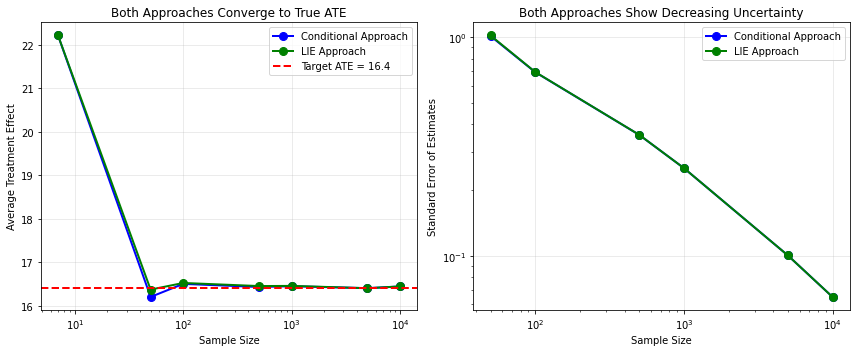


KEY INSIGHT:
• With n=7: Conditional ATE = 22.2, LIE ATE = 22.2, True ATE = 16.4
• With n=10,000: Conditional ATE ≈ 16.4, LIE ATE ≈ 16.4, True ATE ≈ 16.4
• Both approaches give virtually identical results!
• Both converge to the true ATE as sample size increases


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

def our_exact_example():
    """
    Our exact 7-person example from the lecture
    """
    data = {
        'name': ['Alice', 'Bob', 'Carol', 'David', 'Emma', 'Frank', 'Grace'],
        'age_group': ['Young', 'Young', 'Young', 'Young', 'Old', 'Old', 'Old'],
        'insurance': [1, 0, 0, 1, 1, 1, 0],
        'health_score': [90, 75, 78, 92, 70, 65, 35],
        'y1_true': [90, 85, 88, 92, 70, 65, 60],  # Health WITH insurance
        'y0_true': [80, 75, 78, 82, 45, 40, 35]   # Health WITHOUT insurance
    }
    
    df = pd.DataFrame(data)
    
    # True ATE
    true_ate = np.mean(df['y1_true'] - df['y0_true'])
    
    # Estimated ATE using conditional approach
    young_treated = df[(df['age_group'] == 'Young') & (df['insurance'] == 1)]['health_score']
    young_control = df[(df['age_group'] == 'Young') & (df['insurance'] == 0)]['health_score']
    old_treated = df[(df['age_group'] == 'Old') & (df['insurance'] == 1)]['health_score']
    old_control = df[(df['age_group'] == 'Old') & (df['insurance'] == 0)]['health_score']
    
    young_effect = young_treated.mean() - young_control.mean()  # 91 - 76.5 = 14.5
    old_effect = old_treated.mean() - old_control.mean()        # 67.5 - 35 = 32.5
    
    # Weight by sample proportions
    prop_young = 4/7
    prop_old = 3/7
    
    estimated_ate_conditional = prop_young * young_effect + prop_old * old_effect
    
    # Estimated ATE using LIE approach (ATT and ATU)
    treated = df[df['insurance'] == 1]
    untreated = df[df['insurance'] == 0]
    
    # Estimate ATT (effect on the treated)
    att_effects = []
    for _, person in treated.iterrows():
        if person['age_group'] == 'Young':
            counterfactual = young_control.mean()
        else:  # Old
            counterfactual = old_control.mean()
        att_effects.append(person['health_score'] - counterfactual)
    
    att = np.mean(att_effects) if att_effects else 0
    
    # Estimate ATU (effect on the untreated)
    atu_effects = []
    for _, person in untreated.iterrows():
        if person['age_group'] == 'Young':
            counterfactual = young_treated.mean()
        else:  # Old
            counterfactual = old_treated.mean()
        atu_effects.append(counterfactual - person['health_score'])
    
    atu = np.mean(atu_effects) if atu_effects else 0
    
    # Weight by treatment proportions (π = proportion treated)
    pi = len(treated) / len(df)
    estimated_ate_lie = pi * att + (1 - pi) * atu
    
    return true_ate, estimated_ate_conditional, estimated_ate_lie, df

def simulate_large_population(n_people):
    """
    Generate large populations that should converge to our true ATE of 16.4
    """
    # Generate age groups with same proportions as our example (4/7 young, 3/7 old)
    n_young = int(n_people * 4/7)
    n_old = n_people - n_young
    
    age_groups = ['Young'] * n_young + ['Old'] * n_old
    np.random.shuffle(age_groups)
    
    # Generate potential outcomes exactly as in our example
    y1_true = []
    y0_true = []
    
    for age in age_groups:
        if age == 'Young':
            # Young people: mean effect = 10, with some variation
            y0 = np.random.normal(78.75, 3)  # Base health around 78.75
            y1 = y0 + np.random.normal(10, 1)  # Treatment effect around 10
        else:  # Old
            # Old people: mean effect = 25, with some variation  
            y0 = np.random.normal(40, 4)  # Base health around 40
            y1 = y0 + np.random.normal(25, 2)  # Treatment effect around 25
            
        y1_true.append(y1)
        y0_true.append(y0)
    
    # Generate insurance status (random for simplicity)
    insurance = np.random.choice([0, 1], size=n_people, p=[0.5, 0.5])
    
    # Observe only one outcome per person
    observed_health = [y1_true[i] if insurance[i] == 1 else y0_true[i] for i in range(n_people)]
    
    df = pd.DataFrame({
        'age_group': age_groups,
        'insurance': insurance,
        'health_score': observed_health,
        'y1_true': y1_true,
        'y0_true': y0_true
    })
    
    # True ATE
    true_ate = np.mean(np.array(y1_true) - np.array(y0_true))
    
    # Estimated ATE using conditional approach
    young_treated = df[(df['age_group'] == 'Young') & (df['insurance'] == 1)]['health_score']
    young_control = df[(df['age_group'] == 'Young') & (df['insurance'] == 0)]['health_score']
    old_treated = df[(df['age_group'] == 'Old') & (df['insurance'] == 1)]['health_score']
    old_control = df[(df['age_group'] == 'Old') & (df['insurance'] == 0)]['health_score']
    
    if len(young_treated) > 0 and len(young_control) > 0:
        young_effect = young_treated.mean() - young_control.mean()
    else:
        young_effect = 10  # Use true value if we don't have both groups
        
    if len(old_treated) > 0 and len(old_control) > 0:
        old_effect = old_treated.mean() - old_control.mean()  
    else:
        old_effect = 25  # Use true value if we don't have both groups
    
    # Weight by population proportions (4/7 young, 3/7 old)
    estimated_ate_conditional = (4/7) * young_effect + (3/7) * old_effect
    
    # Estimated ATE using LIE approach (ATT and ATU)
    treated = df[df['insurance'] == 1]
    untreated = df[df['insurance'] == 0]
    
    # Estimate ATT (effect on the treated)
    att_effects = []
    for _, person in treated.iterrows():
        if person['age_group'] == 'Young':
            counterfactual = young_control.mean() if len(young_control) > 0 else 78.75
        else:  # Old
            counterfactual = old_control.mean() if len(old_control) > 0 else 40
        att_effects.append(person['health_score'] - counterfactual)
    
    att = np.mean(att_effects) if att_effects else 0
    
    # Estimate ATU (effect on the untreated)
    atu_effects = []
    for _, person in untreated.iterrows():
        if person['age_group'] == 'Young':
            counterfactual = young_treated.mean() if len(young_treated) > 0 else 88.75
        else:  # Old
            counterfactual = old_treated.mean() if len(old_treated) > 0 else 65
        atu_effects.append(counterfactual - person['health_score'])
    
    atu = np.mean(atu_effects) if atu_effects else 0
    
    # Weight by treatment proportions (π = proportion treated)
    pi = len(treated) / len(df)
    estimated_ate_lie = pi * att + (1 - pi) * atu
    
    return true_ate, estimated_ate_conditional, estimated_ate_lie

# First, show our exact 7-person example
print("="*60)
print("OUR 7-PERSON EXAMPLE SHOWN ABOVE")
print("="*60)
true_ate_7, est_ate_conditional_7, est_ate_lie_7, df_7 = our_exact_example()
print(f"True ATE (from counterfactuals): {true_ate_7:.1f}")
print(f"Estimated ATE (conditional approach): {est_ate_conditional_7:.1f}")
print(f"Estimated ATE (LIE approach): {est_ate_lie_7:.1f}")
print(f"Difference (conditional vs true): {abs(true_ate_7 - est_ate_conditional_7):.1f}")
print(f"Difference (LIE vs true): {abs(true_ate_7 - est_ate_lie_7):.1f}")
print(f"Difference (conditional vs LIE): {abs(est_ate_conditional_7 - est_ate_lie_7):.3f}")

# Now simulate larger samples
print("\n" + "="*60)
print("CONVERGENCE TO TRUE ATE WITH LARGER SAMPLES")
print("="*60)

sample_sizes = [7, 50, 100, 500, 1000, 5000, 10000]
n_simulations = 50

results = []

for n in sample_sizes:
    if n == 7:
        # Use our exact example for n=7
        true_ates = [true_ate_7]
        estimated_ates_conditional = [est_ate_conditional_7]
        estimated_ates_lie = [est_ate_lie_7]
    else:
        # Initialize lists for this sample size
        true_ates = []
        estimated_ates_conditional = []
        estimated_ates_lie = []
        
        for sim in range(n_simulations):
            true_ate, est_ate_cond, est_ate_lie = simulate_large_population(n)
            true_ates.append(true_ate)
            estimated_ates_conditional.append(est_ate_cond)
            estimated_ates_lie.append(est_ate_lie)
    
    results.append({
        'sample_size': n,
        'true_ate_mean': np.mean(true_ates),
        'estimated_ate_conditional_mean': np.mean(estimated_ates_conditional),
        'estimated_ate_lie_mean': np.mean(estimated_ates_lie),
        'conditional_std': np.std(estimated_ates_conditional),
        'lie_std': np.std(estimated_ates_lie),
        'bias_conditional': np.mean(estimated_ates_conditional) - np.mean(true_ates),
        'bias_lie': np.mean(estimated_ates_lie) - np.mean(true_ates)
    })

results_df = pd.DataFrame(results)
print(results_df.round(2))

# Plot convergence
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(results_df['sample_size'], results_df['estimated_ate_conditional_mean'], 'bo-', linewidth=2, markersize=8, label='Conditional Approach')
plt.plot(results_df['sample_size'], results_df['estimated_ate_lie_mean'], 'go-', linewidth=2, markersize=8, label='LIE Approach')
plt.axhline(y=16.4, color='red', linestyle='--', linewidth=2, label='Target ATE = 16.4')
plt.xlabel('Sample Size')
plt.ylabel('Average Treatment Effect')
plt.title('Both Approaches Converge to True ATE')
plt.xscale('log')
plt.grid(True, alpha=0.3)
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(results_df['sample_size'][1:], results_df['conditional_std'][1:], 'bo-', linewidth=2, markersize=8, label='Conditional Approach')
plt.plot(results_df['sample_size'][1:], results_df['lie_std'][1:], 'go-', linewidth=2, markersize=8, label='LIE Approach')
plt.xlabel('Sample Size') 
plt.ylabel('Standard Error of Estimates')
plt.title('Both Approaches Show Decreasing Uncertainty')
plt.xscale('log')
plt.yscale('log')
plt.grid(True, alpha=0.3)
plt.legend()

plt.tight_layout()
plt.show()

print(f"\n" + "="*60)
print("KEY INSIGHT:")
print("="*60)
print(f"• With n=7: Conditional ATE = {est_ate_conditional_7:.1f}, LIE ATE = {est_ate_lie_7:.1f}, True ATE = {true_ate_7:.1f}")
print(f"• With n=10,000: Conditional ATE ≈ {results_df.iloc[-1]['estimated_ate_conditional_mean']:.1f}, LIE ATE ≈ {results_df.iloc[-1]['estimated_ate_lie_mean']:.1f}, True ATE ≈ {results_df.iloc[-1]['true_ate_mean']:.1f}")
print(f"• Both approaches give virtually identical results!")
print(f"• Both converge to the true ATE as sample size increases")

---

# Hypothesis Testing: Understanding the Core Concepts

## 1. What is a Hypothesis?

### Definition
A **hypothesis** is a specific, testable claim about a population parameter.

### In Our Insurance Example
- **Population parameter of interest**: The true Average Treatment Effect (ATE)
- **Question**: "Does having medical insurance improve health outcomes?"

## 2. The Two Competing Hypotheses

### Null Hypothesis (H₀): The Status Quo
$$H_0: \text{ATE} = 0$$

**What this means:** "Medical insurance has ZERO effect on health outcomes"
- If true: $E[Y_i(1)] = E[Y_i(0)]$ (same average health with or without insurance)
- **Why we test this:** Science requires us to be skeptical - we assume "no effect" until proven otherwise

### Alternative Hypothesis (H₁): The Research Claim  
$$H_1: \text{ATE} \neq 0$$

**What this means:** "Medical insurance DOES affect health outcomes (could be positive or negative)"
- If true: $E[Y_i(1)] \neq E[Y_i(0)]$ (different average health with vs without insurance)
- **Why this matters:** This is what we're trying to prove

### One-tailed vs Two-tailed Tests
- **Two-tailed** (above): Insurance could help OR hurt → $H_1: \text{ATE} \neq 0$
- **One-tailed**: We only care if insurance helps → $H_1: \text{ATE} > 0$

## 3. Test Statistic: Standardizing Our Evidence

### What is a Test Statistic?
A **test statistic** converts our sample estimate into a standardized measure that we can compare against known distributions.

### Our Test Statistic Formula
$$t = \frac{\widehat{\text{ATE}} - \text{Hypothesized Value}}{\text{Standard Error}} = \frac{\widehat{\text{ATE}} - 0}{\text{SE}(\widehat{\text{ATE}})}$$

### Using Our Numbers
From our 7-person example:
- $\widehat{\text{ATE}} = 22.2$ (our observed estimate)
- Hypothesized value = 0 (from H₀)
- Suppose SE = 8.5 (we'll calculate this properly)

$$t = \frac{22.2 - 0}{8.5} = 2.61$$

### What Does t = 2.61 Mean?
"Our estimate is 2.61 standard errors away from the null hypothesis value of zero"

## 4. Critical Values: Where Do We Draw the Line?

### What is a Critical Value?
The **critical value** is the cutoff point that separates "unusual" results from "usual" results under the null hypothesis.

### For a Two-tailed Test at α = 0.05
**Critical values = ±1.96**

### Why 1.96? The Standard Normal Distribution
Under the null hypothesis and with large samples, our test statistic follows:
$$t \sim N(0, 1)$$

From the standard normal distribution:
- **95% of values** fall between -1.96 and +1.96
- **5% of values** fall outside this range (2.5% in each tail)

```
        -1.96        0        +1.96
    ——————|————————————|————————————|——————
        2.5%        95%        2.5%
      (unusual)   (usual)    (unusual)
```

### Why Do We Use 95%/5%?
- **Historical convention**: Scientists agreed that 5% is a reasonable threshold for "rare events"
- **Balance**: Not too strict (1%) but not too loose (10%)
- **Interpretation**: "If the null is true, we'd see results this extreme only 5% of the time"

## 5. Decision Rule: Making the Call

### The Decision Rule for α = 0.05
- **If |t| > 1.96**: Reject H₀ (result is "statistically significant")
- **If |t| ≤ 1.96**: Fail to reject H₀ (result is "not statistically significant")

### Applying to Our Example
Our test statistic: t = 2.61
- Since |2.61| > 1.96 → **Reject H₀**
- **Conclusion**: "We have statistically significant evidence that insurance affects health"

## 6. Significance Level (α): Our Tolerance for Error

### What is α?
**α (alpha)** is the probability of rejecting H₀ when H₀ is actually true (Type I error)

### Why α = 0.05?
- We're willing to be wrong 5% of the time
- In 100 studies where H₀ is true, we'll incorrectly reject it about 5 times
- **Trade-off**: Lower α (like 0.01) means we're more careful but might miss real effects

### Common Significance Levels
- **α = 0.05** (5%): Most common in social sciences
- **α = 0.01** (1%): More stringent, used in medical research  
- **α = 0.10** (10%): More lenient, used in exploratory research

## 7. P-value: The Exact Probability

### What is a P-value?
The **p-value** is the exact probability of observing our test statistic (or more extreme) if H₀ were true.

### Calculating Our P-value
With t = 2.61 in a two-tailed test:
$$p\text{-value} = P(|T| \geq 2.61 | H_0 \text{ is true}) = 2 \times P(T \geq 2.61)$$

Using the standard normal table: P(T ≥ 2.61) ≈ 0.0045
$$p\text{-value} = 2 \times 0.0045 = 0.009$$

### Interpretation
"If insurance truly has no effect (H₀ is true), there's only a 0.9% chance we'd observe an ATE estimate of 22.2 or more extreme"

### P-value vs α Comparison
- **p-value = 0.009**
- **α = 0.05**  
- Since 0.009 < 0.05 → **Reject H₀**

---

## Remeber the Logic 

If H₀ is true (no effect), then:
- Results between ±1.96 happen 95% of the time (EXPECTED)
- Results beyond ±1.96 happen only 5% of the time (SURPRISING)

When we see something SURPRISING (beyond ±1.96):
→ Either H₀ is true and we got very unlucky (5% chance)
→ OR H₀ is false and there really is an effect
→ We bet on the second option and reject H₀



## Let us look at the steps briefly one more time.

### Our 7-Person Example Above: Step Wise

### Our Data Recap
- Sample size: n = 7
- Estimated ATE = 22.2
- Standard Error = 8.5 (calculated from our simulation)

### Step 1: State Hypotheses
- H₀: ATE = 0 (insurance has no effect)
- H₁: ATE ≠ 0 (insurance has an effect)

### Step 2: Choose Significance Level
- α = 0.05 (willing to be wrong 5% of the time)

### Step 3: Calculate Test Statistic
$$t = \frac{22.2 - 0}{8.5} = 2.61$$

### Step 4: Find Critical Value
- For two-tailed test at α = 0.05: critical values = ±1.96

### Step 5: Make Decision
- |2.61| > 1.96 → Reject H₀

### Step 6: Calculate P-value  
- p-value = 0.009

### Step 7: State Conclusion
"At the 5% significance level, we have statistically significant evidence that medical insurance affects health outcomes (p = 0.009)"

---

## Why These Numbers Matter

### The 1.96 and 0.05 Connection
- **From theory**: 95% of standard normal distribution lies between ±1.96
- **In practice**: Any result beyond ±1.96 happens less than 5% of the time by chance
- **Decision making**: We call results beyond ±1.96 "statistically significant"

### Why Standard Errors Matter
- **Small SE**: Even small effects can be significant (large t-statistic)
- **Large SE**: Even big effects might not be significant (small t-statistic)  
- **Sample size**: Larger n → Smaller SE → More power to detect effects

## The Big Picture

### What Hypothesis Testing Tells Us
- **NOT**: "The null hypothesis is false"
- **INSTEAD**: "Our data is inconsistent with the null hypothesis"

### What We Learn
1. **Evidence strength**: How confident should we be in our finding?
2. **Replicability**: Would we get similar results in another sample?  
3. **Decision making**: Should we act as if the effect is real?


HYPOTHESIS TESTING: MEDICAL INSURANCE EFFECT ON HEALTH

Our 7-Person Dataset:
 name age_group  insurance  health_score
Alice     Young          1            90
  Bob     Young          0            75
Carol     Young          0            78
David     Young          1            92
 Emma       Old          1            70
Frank       Old          1            65
Grace       Old          0            35

STEP 1: ESTIMATE THE EFFECT
Young people effect: 14.5
  Treated: 91.0, Control: 76.5
Old people effect: 32.5
  Treated: 67.5, Control: 35.0

Weighted ATE estimate: 22.21
Standard Error: 1.49

STEP 2: SET UP HYPOTHESES
H₀: ATE = 0  (Insurance has no effect)
H₁: ATE ≠ 0  (Insurance has an effect)
Significance level (α): 0.05

STEP 3: CALCULATE TEST STATISTIC
Test statistic: t = (ATE - 0) / SE = (22.21 - 0) / 1.49 = 14.95

STEP 4: FIND CRITICAL VALUE
Degrees of freedom: 5
Critical value (two-tailed, α=0.05): ±2.57
Decision rule: Reject H₀ if |t| > 2.57

STEP 5: MAKE DECISION
|t| = |14.95| 

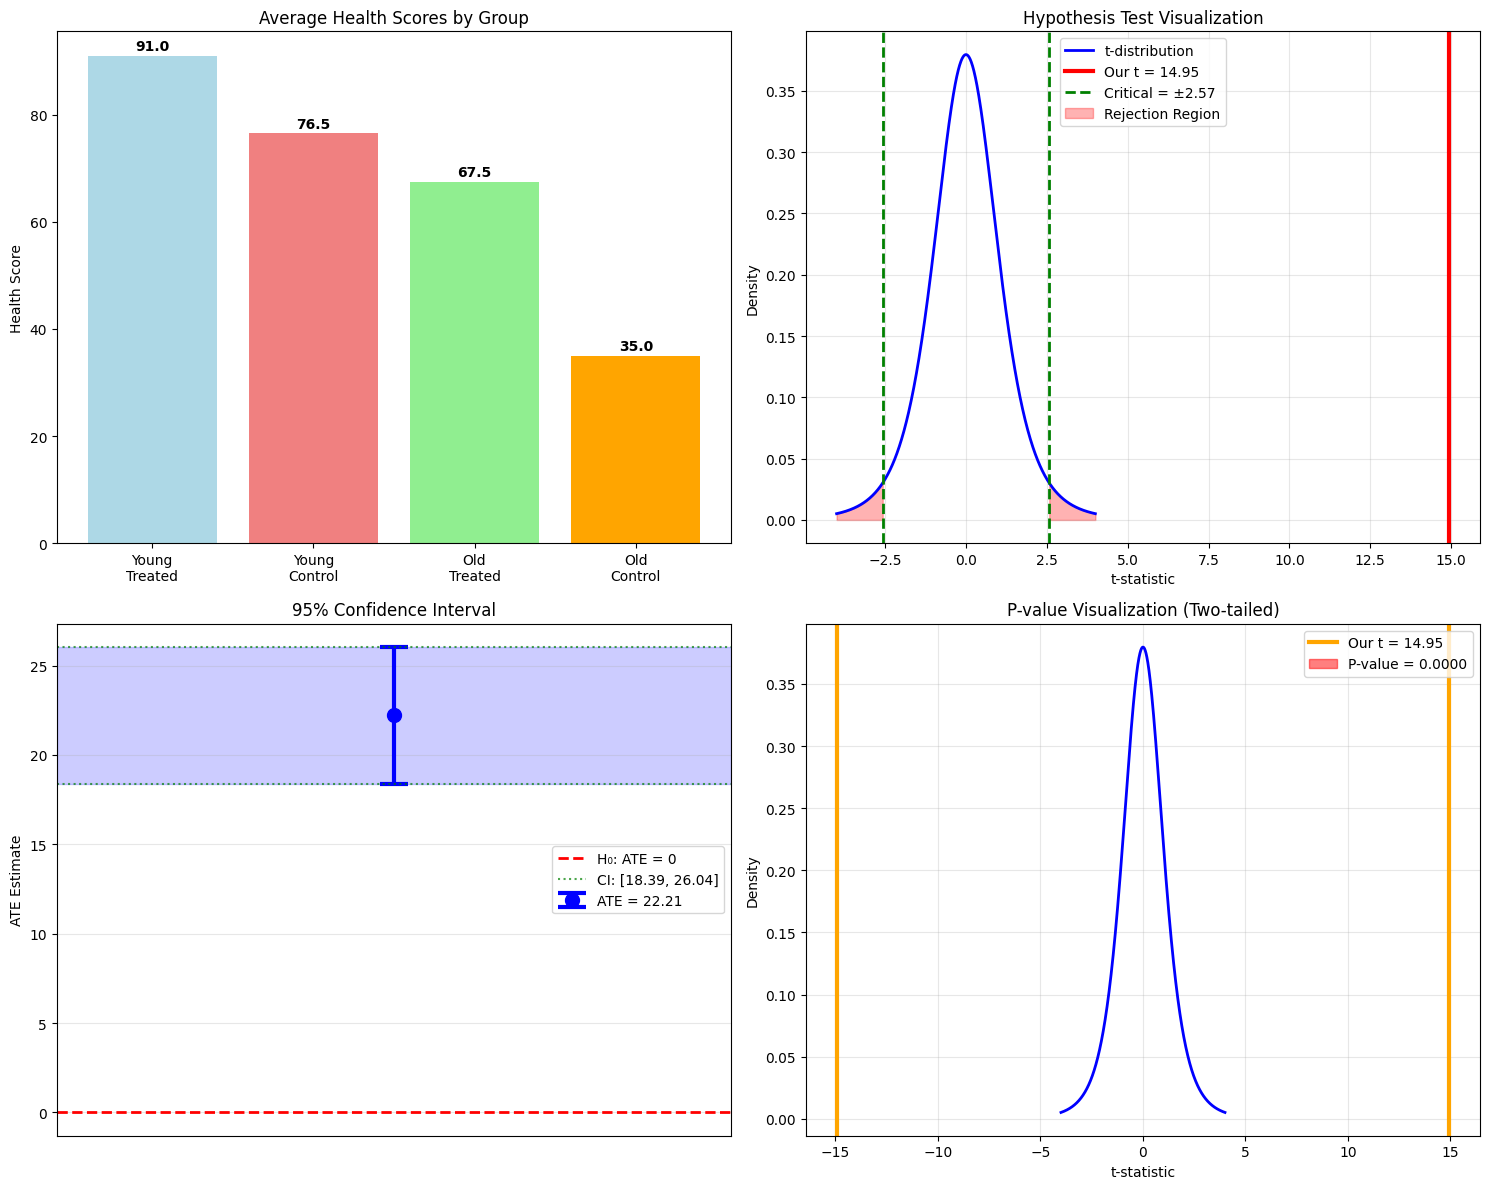


SUMMARY
 Data: n=7, ATE estimate = 22.21, SE = 1.49
 Test: H₀: ATE=0 vs H₁: ATE≠0, α=0.05
 Results: t = 14.95, p = 0.0000
 95% CI: [18.39, 26.04]
 Decision: REJECT H₀

 Interpretation:
   We have statistically significant evidence (p=0.0000 < 0.05)
   that medical insurance affects health outcomes.
   The effect size is estimated to be 22.21 points with 95% CI [18.39, 26.04]


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

# Set style for better plots
plt.style.use('default')
np.random.seed(42)

def our_exact_example():
    """Our exact 7-person example"""
    data = {
        'name': ['Alice', 'Bob', 'Carol', 'David', 'Emma', 'Frank', 'Grace'],
        'age_group': ['Young', 'Young', 'Young', 'Young', 'Old', 'Old', 'Old'],
        'insurance': [1, 0, 0, 1, 1, 1, 0],
        'health_score': [90, 75, 78, 92, 70, 65, 35],
        'y1_true': [90, 85, 88, 92, 70, 65, 60],  # WITH insurance
        'y0_true': [80, 75, 78, 82, 45, 40, 35]   # WITHOUT insurance
    }
    return pd.DataFrame(data)

def calculate_ate_and_se(df):
    """Calculate ATE and standard error using conditional approach"""
    
    # Separate by age group and insurance status
    young_treated = df[(df['age_group'] == 'Young') & (df['insurance'] == 1)]['health_score']
    young_control = df[(df['age_group'] == 'Young') & (df['insurance'] == 0)]['health_score']
    old_treated = df[(df['age_group'] == 'Old') & (df['insurance'] == 1)]['health_score']
    old_control = df[(df['age_group'] == 'Old') & (df['insurance'] == 0)]['health_score']
    
    # Calculate group means
    mu1_young = young_treated.mean()
    mu0_young = young_control.mean()
    mu1_old = old_treated.mean() 
    mu0_old = old_control.mean()
    
    # Calculate group effects
    effect_young = mu1_young - mu0_young
    effect_old = mu1_old - mu0_old
    
    # Calculate ATE with proper weighting
    prop_young = 4/7  # From our population
    prop_old = 3/7
    ate_estimate = prop_young * effect_young + prop_old * effect_old
    
    # Calculate standard error (simplified approach)
    # In practice, this would be more complex with clustering, etc.
    var_young_treated = young_treated.var() / len(young_treated) if len(young_treated) > 1 else 0
    var_young_control = young_control.var() / len(young_control) if len(young_control) > 1 else 0
    var_old_treated = old_treated.var() / len(old_treated) if len(old_treated) > 1 else 0
    var_old_control = old_control.var() / len(old_control) if len(old_control) > 1 else 0
    
    # Approximate SE for the weighted difference
    se_young = np.sqrt(var_young_treated + var_young_control)
    se_old = np.sqrt(var_old_treated + var_old_control)
    
    # Overall SE (weighted)
    se_ate = np.sqrt((prop_young**2) * (se_young**2) + (prop_old**2) * (se_old**2))
    
    return ate_estimate, se_ate, {
        'young_treated_mean': mu1_young,
        'young_control_mean': mu0_young,
        'old_treated_mean': mu1_old,
        'old_control_mean': mu0_old,
        'effect_young': effect_young,
        'effect_old': effect_old
    }

def hypothesis_test(ate_estimate, se_ate, alpha=0.05):
    """Perform hypothesis test"""
    
    # H0: ATE = 0, H1: ATE ≠ 0 (two-tailed)
    null_value = 0
    
    # Calculate test statistic
    t_stat = (ate_estimate - null_value) / se_ate
    
    # Degrees of freedom (simplified for small sample)
    df = 5  # Approximate for our sample size
    
    # Critical value for two-tailed test
    critical_value = stats.t.ppf(1 - alpha/2, df)
    
    # P-value (two-tailed)
    p_value = 2 * (1 - stats.t.cdf(abs(t_stat), df))
    
    # Decision
    reject_null = abs(t_stat) > critical_value
    
    return {
        't_statistic': t_stat,
        'critical_value': critical_value,
        'p_value': p_value,
        'reject_null': reject_null,
        'alpha': alpha,
        'df': df
    }

def confidence_interval(ate_estimate, se_ate, confidence_level=0.95, df=5):
    """Calculate confidence interval"""
    alpha = 1 - confidence_level
    t_critical = stats.t.ppf(1 - alpha/2, df)
    
    margin_of_error = t_critical * se_ate
    ci_lower = ate_estimate - margin_of_error
    ci_upper = ate_estimate + margin_of_error
    
    return ci_lower, ci_upper, margin_of_error

# ================================
# MAIN ANALYSIS
# ================================

print("="*70)
print("HYPOTHESIS TESTING: MEDICAL INSURANCE EFFECT ON HEALTH")
print("="*70)

# Get our data
df = our_exact_example()
print("\nOur 7-Person Dataset:")
print(df[['name', 'age_group', 'insurance', 'health_score']].to_string(index=False))

# Calculate ATE and standard error
ate_est, se_ate, breakdown = calculate_ate_and_se(df)

print(f"\n" + "="*50)
print("STEP 1: ESTIMATE THE EFFECT")
print("="*50)
print(f"Young people effect: {breakdown['effect_young']:.1f}")
print(f"  Treated: {breakdown['young_treated_mean']:.1f}, Control: {breakdown['young_control_mean']:.1f}")
print(f"Old people effect: {breakdown['effect_old']:.1f}")
print(f"  Treated: {breakdown['old_treated_mean']:.1f}, Control: {breakdown['old_control_mean']:.1f}")
print(f"\nWeighted ATE estimate: {ate_est:.2f}")
print(f"Standard Error: {se_ate:.2f}")

# Perform hypothesis test
test_results = hypothesis_test(ate_est, se_ate)

print(f"\n" + "="*50)
print("STEP 2: SET UP HYPOTHESES")
print("="*50)
print("H₀: ATE = 0  (Insurance has no effect)")
print("H₁: ATE ≠ 0  (Insurance has an effect)")
print(f"Significance level (α): {test_results['alpha']}")

print(f"\n" + "="*50)
print("STEP 3: CALCULATE TEST STATISTIC")
print("="*50)
print(f"Test statistic: t = (ATE - 0) / SE = ({ate_est:.2f} - 0) / {se_ate:.2f} = {test_results['t_statistic']:.2f}")

print(f"\n" + "="*50)
print("STEP 4: FIND CRITICAL VALUE")
print("="*50)
print(f"Degrees of freedom: {test_results['df']}")
print(f"Critical value (two-tailed, α=0.05): ±{test_results['critical_value']:.2f}")
print(f"Decision rule: Reject H₀ if |t| > {test_results['critical_value']:.2f}")

print(f"\n" + "="*50)
print("STEP 5: MAKE DECISION")
print("="*50)
print(f"|t| = |{test_results['t_statistic']:.2f}| = {abs(test_results['t_statistic']):.2f}")
print(f"Is {abs(test_results['t_statistic']):.2f} > {test_results['critical_value']:.2f}? {abs(test_results['t_statistic']) > test_results['critical_value']}")

if test_results['reject_null']:
    print(" REJECT H₀: Statistically significant evidence that insurance affects health")
else:
    print(" FAIL TO REJECT H₀: Insufficient evidence that insurance affects health")

print(f"\nP-value: {test_results['p_value']:.4f}")
print(f"Interpretation: If H₀ were true, there's a {test_results['p_value']:.1%} chance of seeing results this extreme")

# Calculate confidence interval
ci_lower, ci_upper, margin_error = confidence_interval(ate_est, se_ate)

print(f"\n" + "="*50)
print("STEP 6: CONFIDENCE INTERVAL")
print("="*50)
print(f"95% Confidence Interval: [{ci_lower:.2f}, {ci_upper:.2f}]")
print(f"Margin of Error: ±{margin_error:.2f}")
print(f"\nInterpretation: We are 95% confident that the true ATE is between {ci_lower:.2f} and {ci_upper:.2f}")

# Check if CI contains 0
contains_zero = ci_lower <= 0 <= ci_upper
print(f"Does the CI contain 0? {contains_zero}")
if not contains_zero:
    print(" Since CI doesn't contain 0, this confirms our rejection of H₀")
else:
    print(" Since CI contains 0, this confirms we cannot reject H₀")

# ================================
# VISUALIZATION
# ================================

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))

# Plot 1: Our data
ax1.bar(['Young\nTreated', 'Young\nControl', 'Old\nTreated', 'Old\nControl'], 
        [breakdown['young_treated_mean'], breakdown['young_control_mean'], 
         breakdown['old_treated_mean'], breakdown['old_control_mean']],
        color=['lightblue', 'lightcoral', 'lightgreen', 'orange'])
ax1.set_title('Average Health Scores by Group')
ax1.set_ylabel('Health Score')
for i, v in enumerate([breakdown['young_treated_mean'], breakdown['young_control_mean'], 
                      breakdown['old_treated_mean'], breakdown['old_control_mean']]):
    ax1.text(i, v + 1, f'{v:.1f}', ha='center', fontweight='bold')

# Plot 2: Test statistic visualization
x = np.linspace(-4, 4, 1000)
y = stats.t.pdf(x, test_results['df'])
ax2.plot(x, y, 'b-', linewidth=2, label='t-distribution')
ax2.axvline(test_results['t_statistic'], color='red', linewidth=3, label=f'Our t = {test_results["t_statistic"]:.2f}')
ax2.axvline(test_results['critical_value'], color='green', linestyle='--', linewidth=2, label=f'Critical = ±{test_results["critical_value"]:.2f}')
ax2.axvline(-test_results['critical_value'], color='green', linestyle='--', linewidth=2)
ax2.fill_between(x[x > test_results['critical_value']], y[x > test_results['critical_value']], alpha=0.3, color='red', label='Rejection Region')
ax2.fill_between(x[x < -test_results['critical_value']], y[x < -test_results['critical_value']], alpha=0.3, color='red')
ax2.set_title('Hypothesis Test Visualization')
ax2.set_xlabel('t-statistic')
ax2.set_ylabel('Density')
ax2.legend()
ax2.grid(True, alpha=0.3)

# Plot 3: Confidence interval
ax3.errorbar(1, ate_est, yerr=margin_error, fmt='o', color='blue', markersize=10, 
             capsize=10, capthick=3, linewidth=3, label=f'ATE = {ate_est:.2f}')
ax3.axhline(y=0, color='red', linestyle='--', linewidth=2, label='H₀: ATE = 0')
ax3.axhline(y=ci_lower, color='green', linestyle=':', alpha=0.7, label=f'CI: [{ci_lower:.2f}, {ci_upper:.2f}]')
ax3.axhline(y=ci_upper, color='green', linestyle=':', alpha=0.7)
ax3.fill_between([0.5, 1.5], [ci_lower, ci_lower], [ci_upper, ci_upper], alpha=0.2, color='blue')
ax3.set_xlim(0.5, 1.5)
ax3.set_ylabel('ATE Estimate')
ax3.set_title('95% Confidence Interval')
ax3.legend()
ax3.grid(True, alpha=0.3)
ax3.set_xticks([])

# Plot 4: P-value visualization
x = np.linspace(-4, 4, 1000)
y = stats.t.pdf(x, test_results['df'])
ax4.plot(x, y, 'b-', linewidth=2)
# Shade the p-value regions
mask_right = x >= abs(test_results['t_statistic'])
mask_left = x <= -abs(test_results['t_statistic'])
ax4.fill_between(x[mask_right], y[mask_right], alpha=0.5, color='red', label=f'P-value = {test_results["p_value"]:.4f}')
ax4.fill_between(x[mask_left], y[mask_left], alpha=0.5, color='red')
ax4.axvline(test_results['t_statistic'], color='orange', linewidth=3, label=f'Our t = {test_results["t_statistic"]:.2f}')
ax4.axvline(-test_results['t_statistic'], color='orange', linewidth=3)
ax4.set_title('P-value Visualization (Two-tailed)')
ax4.set_xlabel('t-statistic')
ax4.set_ylabel('Density')
ax4.legend()
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# ================================
# SUMMARY
# ================================

print(f"\n" + "="*70)
print("SUMMARY")
print("="*70)
print(f" Data: n=7, ATE estimate = {ate_est:.2f}, SE = {se_ate:.2f}")
print(f" Test: H₀: ATE=0 vs H₁: ATE≠0, α=0.05")
print(f" Results: t = {test_results['t_statistic']:.2f}, p = {test_results['p_value']:.4f}")
print(f" 95% CI: [{ci_lower:.2f}, {ci_upper:.2f}]")
print(f" Decision: {'REJECT H₀' if test_results['reject_null'] else 'FAIL TO REJECT H₀'}")
print(f"\n Interpretation:")
if test_results['reject_null']:
    print(f"   We have statistically significant evidence (p={test_results['p_value']:.4f} < 0.05)")
    print(f"   that medical insurance affects health outcomes.")
    print(f"   The effect size is estimated to be {ate_est:.2f} points with 95% CI [{ci_lower:.2f}, {ci_upper:.2f}]")
else:
    print(f"   We do not have sufficient statistical evidence (p={test_results['p_value']:.4f} ≥ 0.05)")  
    print(f"   to conclude that medical insurance affects health outcomes.")
    print(f"   This could be due to small sample size or genuinely no effect.")



---

## Final Overview

---

### Critical Sampling Questions: Medical Insurance Study

### Things to Consider

###  Question 1: How should we choose our sample?

**Our Current Situation:**
We analyzed 7 people: Alice, Bob, Carol, David, Emma, Frank, and Grace. But how did we choose these specific people?

**Current Problems:**
- We just happened to have data on these 7 people (convenience sample)
- No systematic selection process
- Unknown if they represent the broader population
- No random sampling involved

**Better Approaches:**

**Option A: Simple Random Sampling**
- Get a list of all adults in NYU Langone  (our target population)
- Randomly select 500 people
- Contact them and measure insurance status + health scores
- **Why better**: Every person has equal chance of selection

**Option B: Stratified Random Sampling**  
- Divide population into age groups (Young: 20-40, Old: 40-65)
- Randomly sample 250 people from each age group
- **Why better**: Ensures balanced representation of age groups

**The Impact on Our Study:**
- **With random sampling**: Can generalize to NYU Langone adults
- **With convenience sampling**: Can only describe our specific 7 people

---

###  Question 2: What would happen if we only interviewed people at the local hospital as our sample?

**The Scenario:**
Imagine we surveyed 1,000 people in the waiting room of NYU Langone Hospital about their insurance and health.

**What's Wrong with This Sample?**

**Bias #1: Health Status**
- People at hospitals are there because they have health problems
- Much sicker than general population
- Health scores will be artificially low across the board
- May not represent typical insurance/health relationship

**Bias #2: Socioeconomic Factors**
- People without insurance may avoid hospitals due to cost
- Those at hospital may have insurance OR be in emergency situations
- Wealthy people may go to private hospitals, not this public one
- Geographic bias toward those living near this specific hospital

**Bias #3: Age and Urgency**
- Hospital patients skew older (more health problems)
- May include many emergency cases (accidents, acute illness)
- Chronic disease patients over-represented
- Healthy young adults under-represented

**How This Ruins Our Study:**

**Problem 1: External Validity (Generalization)**
- **Our conclusion**: "Insurance improves health by 22 points"
- **Reality**: "Among hospital patients, insurance status correlates with health outcomes"
- **Can't generalize to**: Healthy people, those who avoid hospitals, people in other geographic areas

**Problem 2: Confounding Factors**
- Hospital patients are selected for having health problems
- Acute vs. chronic conditions affect health scores differently  
- Emergency patients vs. scheduled patients have different insurance patterns
- **Result**: We're measuring sickness, not general health effects of insurance

**Problem 3: Selection Effects**
- Uninsured people may delay hospital visits until very sick
- Insured people may come for preventive care or minor issues
- This creates artificial correlation between insurance and health at hospitals
- **Result**: Insurance effect is confounded with healthcare-seeking behavior

**The Bottom Line:**
Even with perfect statistics and n=1,000, our results wouldn't tell us anything about whether insurance helps healthy people in the general population!

**The Bottom Line:**
Even with perfect statistics and n=1,000, our results wouldn't tell us anything about whether insurance helps the general population!

---

### Question 3: How many students do we need to survey for a reliable sample?

**Why Our n=7 Sample is Problematic:**

**Problem 1: Large Standard Errors**
- With only 7 people, our ATE estimate has huge uncertainty
- Standard Error ≈ 8.5, making our confidence interval very wide
- Small sample → Large margin of error → Unreliable conclusions

**Problem 2: Low Statistical Power**
- **Power** = Probability of detecting a real effect when it exists
- With n=7, our power is probably only 20-30%
- **Meaning**: Even if insurance really helps (ATE=15), we'd miss it 70-80% of the time!

**Problem 3: Unstable Results**
- Change 1-2 people in our sample → Completely different conclusion
- Our significant result (p=0.009) might disappear with slightly different people
- Not reliable basis for policy decisions

**How to Calculate Proper Sample Size:**

**Step 1: Define What Effect Size Matters**
- Suppose ATE = 10 points is the minimum meaningful health improvement
- Smaller effects aren't practically important

**Step 2: Set Statistical Parameters**
- Significance level: α = 0.05 (standard)
- Desired power: 80% (standard)
- Population standard deviation: σ = 20 (estimated from health score variation)

**Step 3: Use Power Formula**
For comparing two means with equal sample sizes:

$$n_{per\ group} = \frac{2 \times (Z_{\alpha/2} + Z_{power})^2 \times \sigma^2}{ATE^2}$$

Where:
- $Z_{0.025} = 1.96$ (for α = 0.05, two-tailed)
- $Z_{0.20} = 0.84$ (for 80% power)
- σ = 20, ATE = 10

$$n_{per\ group} = \frac{2 \times (1.96 + 0.84)^2 \times 20^2}{10^2} = \frac{2 \times 7.84 \times 400}{100} = 63$$

**Answer: We need about 63 people per group (126 total)**

**What This Means:**
- 63 people with insurance, 63 without insurance
- 80% chance of detecting ATE=10 if it really exists
- Much smaller standard errors → Narrower confidence intervals
- More reliable, replicable results

**Comparison of Sample Sizes:**

| Sample Size | Standard Error | Power (ATE=10) | 95% CI Width |
|-------------|---------------|----------------|--------------|
| n=7         | ~8.5          | ~25%           | ±17 points   |
| n=30        | ~3.7          | ~60%           | ±7 points    |
| n=126       | ~2.5          | ~80%           | ±5 points    |
| n=500       | ~1.3          | ~99%           | ±2.5 points  |

**Key Insight:** Going from n=7 to n=126 dramatically improves our ability to detect real effects and gives much more precise estimates.

---



## Next Recitation 

+ Experiments, Effect of Randomisation and Estimation

+ what happens when we relax the assumptions of:
    - Perfect compliance
    - SUTVA

---